In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
testdf = pd.read_csv('mnist_test.csv')
traindf = pd.read_csv('mnist_train.csv')

# Data preprocessing

In [15]:
x_train = traindf.drop('label',axis=1).iloc[0:1000,0:1000]
y_train = traindf['label'].iloc[0:1000]
x_test = testdf.drop('label',axis=1).iloc[0:1000,0:1000]
y_test = testdf['label'].iloc[0:1000]
print(x_train.shape)
print(x_test.shape)
y_test

(1000, 784)
(1000, 784)


0      7
1      2
2      1
3      0
4      4
      ..
995    2
996    2
997    0
998    8
999    9
Name: label, Length: 1000, dtype: int64

# Test image

enter random number: 120
2


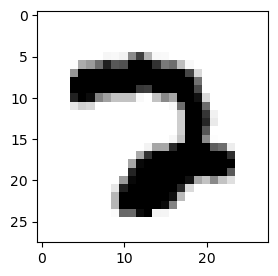

In [19]:
plt.figure(figsize=(3,3))
random_num= int(input("enter random number: "))
image = x_train.iloc[random_num].to_numpy().reshape(28,28)
plt.imshow(image, cmap=matplotlib.cm.binary)
print(y_train[random_num])

# SVM 

In [20]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(x_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [21]:
pred = svm.predict(x_test)
'''testdf["predictions"] = pred'''
mean_squared_error(y_test, pred)

2.98

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression  
lr = LogisticRegression()
lr.fit(x_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
pred = lr.predict(x_test)
mean_squared_error(y_test, pred)

2.526

# Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB 
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [25]:
pred = nb.predict(x_test)
mean_squared_error(y_test,pred)

6.174

# KNN 

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [27]:
pred = knn.predict(x_test)
mean_squared_error(y_test,pred)

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


3.044